In [178]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

In [179]:
#load & view raw data
df = pd.read_csv('fraud_insurance_file.csv')
print('VIEWING DATA :=')
df.head(1000)

VIEWING DATA :=


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [180]:
print("SHAPE := ",df.shape)

SHAPE :=  (1000, 40)


In [181]:
print('CHECK NULL VALUES IN EACH COLUMNS \n')
print(df.isnull().sum()) #check missing value

CHECK NULL VALUES IN EACH COLUMNS 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved 

In [182]:
print('TOTAL TYPES OF EACH FEATURE IN DATASET :=')
df.nunique()

TOTAL TYPES OF EACH FEATURE IN DATASET :=


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [183]:
print("FEATURE DESCRIPTION OF DATASET :=")
df.columns

FEATURE DESCRIPTION OF DATASET :=


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [184]:
print("DATA TYPES OF ALL FEATURES IN DATASET :=")
df.dtypes

DATA TYPES OF ALL FEATURES IN DATASET :=


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [185]:
yes=sum(df['fraud_reported']=='Y')
no=sum(df['fraud_reported']=='N')
print('TOTAL FRAUD REPORTED ')
print('TOTAL TURE FRAUD :=',yes)
print('TOTAL FALSE FRAUD :=',no)

TOTAL FRAUD REPORTED 
TOTAL TURE FRAUD := 247
TOTAL FALSE FRAUD := 753


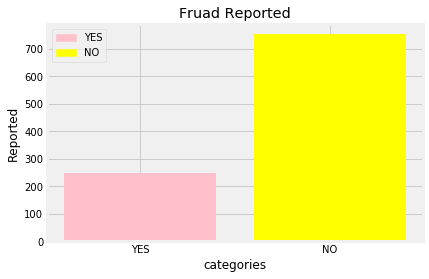

In [186]:
categories=['YES','NO']
reported=[yes,no]
plt.bar(categories,reported,color=['pink','yellow'])
plt.xlabel('categories')
plt.ylabel('Reported')
plt.title('Fruad Reported')

colors = {'YES':'pink', 'NO':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()


In [187]:
incident_state1=df['incident_state']
incident_state2={}
for i in incident_state1:
    if i not in incident_state2:
        incident_state2[i]=1
    else:
        incident_state2[i]=incident_state2[i]+1
incident_state2={k: v for k, v in sorted(incident_state2.items(), key=lambda item: item[1])}
print('NUMBER OF INCIDENT STATE ')
for i in incident_state2:
    print(i,':=:',incident_state2[i])


NUMBER OF INCIDENT STATE 
OH :=: 23
PA :=: 30
VA :=: 110
NC :=: 110
WV :=: 217
SC :=: 248
NY :=: 262


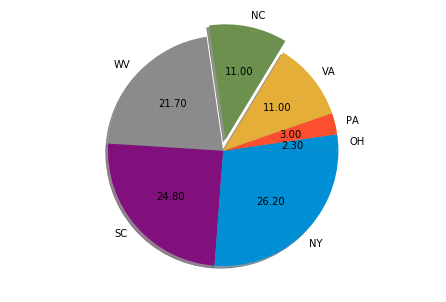

In [188]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
incident_state_type = incident_state2.keys()
incident_state_number = incident_state2.values()
ax.pie(incident_state_number, labels = incident_state_type,explode=(0,0,0,0.1,0,0,0),autopct='%.2f',shadow=True)
plt.show()

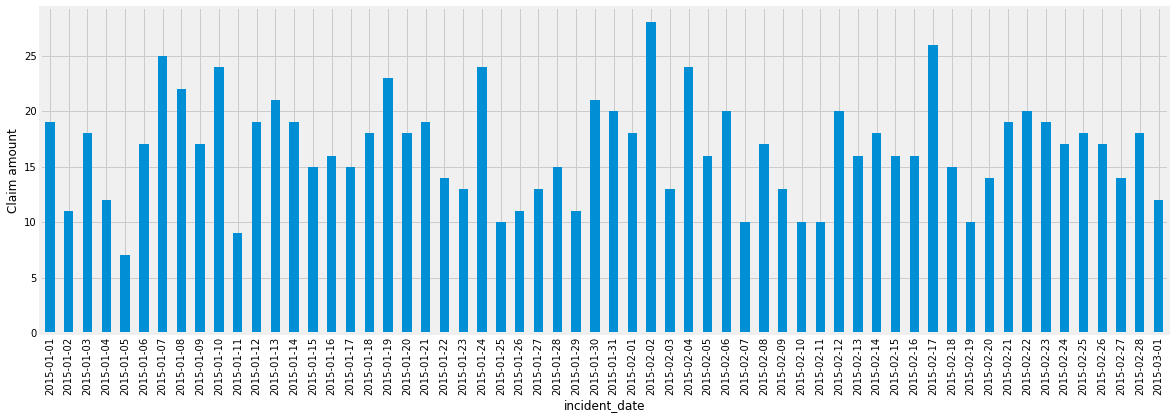

In [189]:
#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount')
plt.show()

In [190]:

policy_state1=df['policy_state']
policy_state2={}
for i in policy_state1:
    if i not in policy_state2:
        policy_state2[i]=1
    else:
        policy_state2[i]=policy_state2[i]+1
policy_state2={k: v for k, v in sorted(policy_state2.items(), key=lambda item: item[1])}
print('NUMBER OF POLICY STATE ')
for i in policy_state2:
    print(i,':=:',policy_state2[i])


NUMBER OF POLICY STATE 
IN :=: 310
IL :=: 338
OH :=: 352


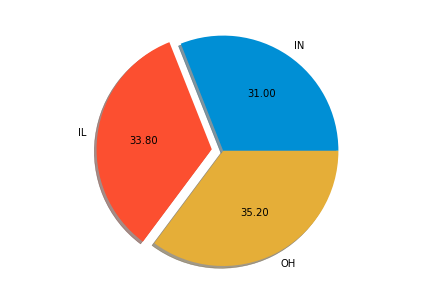

In [191]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

policy_state_type =policy_state2.keys()
policy_state_number = policy_state2.values()

ax.pie(policy_state_number, labels = policy_state_type,explode=(0,0.1,0),autopct='%.2f',shadow=True)
plt.show()

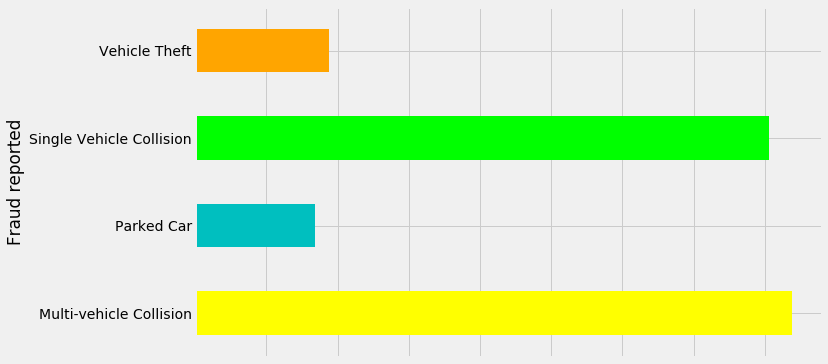

In [192]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.barh(ylim=0,color=['yellow','c','lime','orange'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [193]:
insured_relationship1=df['insured_relationship']
insured_relationship2={}
for i in insured_relationship1:
    if i not in insured_relationship2:
        insured_relationship2[i] = 1
    else:
        insured_relationship2[i]=insured_relationship2[i]+1
insured_relationship2={k: v for k, v in sorted(insured_relationship2.items(), key=lambda item: item[1])}
print('TOTAL NUMBER OF RELATION OF EACH TYPES OF RELATIONSHIP FOR INSURANCE ')
for i in insured_relationship2:
    print(i,':=:',insured_relationship2[i])

TOTAL NUMBER OF RELATION OF EACH TYPES OF RELATIONSHIP FOR INSURANCE 
unmarried :=: 141
wife :=: 155
husband :=: 170
not-in-family :=: 174
other-relative :=: 177
own-child :=: 183


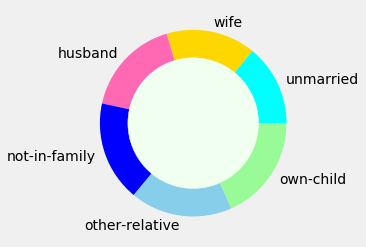

In [194]:
insured_relationship_type= insured_relationship2.keys()
insured_relationship_size=insured_relationship2.values()
color=['cyan','gold','hotpink','blue','skyblue','palegreen']

my_circle=plt.Circle( (0,0), 0.7, color='honeydew')
plt.pie(insured_relationship_size, labels=insured_relationship_type, colors=color)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

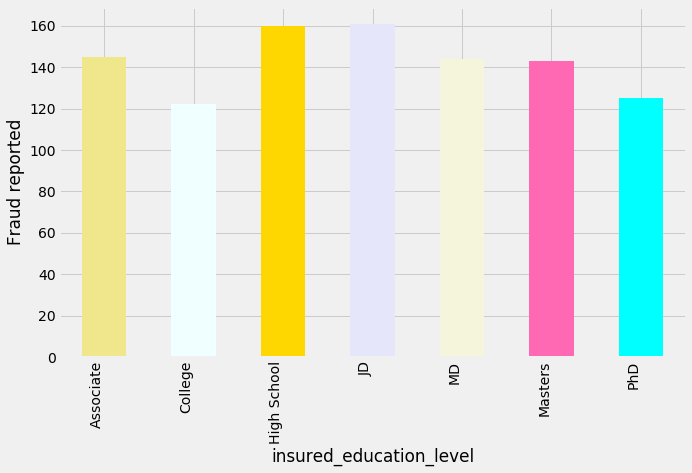

In [209]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_education_level').fraud_reported.count().plot.bar(ylim=0,color=['khaki','azure','gold','lavender','beige','hotpink','cyan'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()